### OLADOKE FUNMILOLA LATEEFAT

### DATA WRANGLING

In [1]:
# Import libraries

import sqlite3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
# Create a database

conn = sqlite3.connect("attr_data.db")

print("Database successfully connected")

Database successfully connected


In [3]:
# Connect to database

cursor =conn.cursor()

# check that cursor is created successfully
print("cursor created successfully\n", type(cursor))

cursor created successfully
 <class 'sqlite3.Cursor'>


In [4]:
# checking the table in the database

sql = """
SELECT name
FROM sqlite_schema
WHERE type = "table";
"""
# execute query
cursor.execute(sql)

# output the query
result = cursor.fetchall()
result

[('attrition_records',), ('sqlite_sequence',)]

In [5]:
# 1ST STEP: GATHERING DATA
# output the query into pandas

sql = """
SELECT *
FROM attrition_records
"""
# execute query
cursor.execute(sql)

# output the query
df = pd.read_sql(sql, conn)
df.head(10)

,id,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,...,1,80,0,8,0,1,6,4,0,5
1,2,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,...,4,80,1,10,3,3,10,7,1,7
2,3,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,...,2,80,0,7,3,3,0,0,0,0
3,4,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,...,3,80,0,8,3,3,8,7,3,0
4,5,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,...,4,80,1,6,3,3,2,2,2,2
5,6,32,No,Travel_Frequently,1005,Research & Development,2,2,Life Sciences,1,...,3,80,0,8,2,2,7,7,3,6
6,7,59,No,Travel_Rarely,1324,Research & Development,3,3,Medical,1,...,1,80,3,12,3,2,1,0,0,0
7,8,30,No,Travel_Rarely,1358,Research & Development,24,1,Life Sciences,1,...,2,80,1,1,2,3,1,0,0,0
8,9,38,No,Travel_Frequently,216,Research & Development,23,3,Life Sciences,1,...,2,80,0,10,2,3,9,7,1,8
9,10,36,No,Travel_Rarely,1299,Research & Development,27,3,Medical,1,...,2,80,2,17,3,2,7,7,7,7


### # 2ND STEP: ASSESSING DATASETS


In [6]:
print(df.shape)
print(df.isna().sum())
print(df.info())
print(df.duplicated().sum())
df.describe()


(1470, 36)
id                          0
Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0

,id,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,735.500000,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,424.496761,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,1.000000,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,368.250000,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,735.500000,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,1102.750000,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,1470.000000,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


### # 3RD STEP: CLEANING THE DATASET

In [7]:
#i) Changing column names to lower case 

df.rename(columns=lambda x: x.lower(), inplace=True)

# Confirm changes
df.head()

,id,age,attrition,businesstravel,dailyrate,department,distancefromhome,education,educationfield,employeecount,...,relationshipsatisfaction,standardhours,stockoptionlevel,totalworkingyears,trainingtimeslastyear,worklifebalance,yearsatcompany,yearsincurrentrole,yearssincelastpromotion,yearswithcurrmanager
0,1,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,...,1,80,0,8,0,1,6,4,0,5
1,2,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,...,4,80,1,10,3,3,10,7,1,7
2,3,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,...,2,80,0,7,3,3,0,0,0,0
3,4,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,...,3,80,0,8,3,3,8,7,3,0
4,5,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,...,4,80,1,6,3,3,2,2,2,2


In [8]:
#ii) Change the columns headers from "paschal case" to "snake case"

df.rename(columns={'id':'id', 'age':'age', 'attrition':'attrition', 'businesstravel':'business_travel', 'dailyrate':'daily_rate', 'department':'department', 'distancefromhome':'distance_from_home', 'education':'education', 'educationfield':'education_field', 'employeecount':'employee_count', 'employeenumber':'employee_number','environmentsatisfaction':'environment_satisfaction', 'gender':'gender', 'hourlyrate':'hourly_rate', 'jobinvolvement':'job_involvement', 'joblevel':'job_level', 'jobrole':'job_role', 'jobsatisfaction':'job_satisfaction', 'maritalstatus':'marital_status', 'monthlyincome':'monthly_income', 'monthlyrate':'monthly_rate', 'numcompaniesworked':'num_companies_worked','over18':'over_18', 'overtime':'over_time', 'percentsalaryhike':'percent_salary_hike', 'performancerating':'performance_rating', 'relationshipsatisfaction':'relationship_satisfaction', 'standardhours':'standard_hours', 'stockoptionlevel':'stock_option_level', 'totalworkingyears':'total_working_years', 'trainingtimeslastyear':'training_times_last_year', 'worklifebalance':'work_life_balance', 'yearsatcompany':'years_at_company','yearsincurrentrole':'years_in_current_role', 'yearssincelastpromotion':'years_since_last_promotion', 'yearswithcurrmanager':'years_with_curr_manager'}, inplace=True)


# View the changes
df.head()

,id,age,attrition,business_travel,daily_rate,department,distance_from_home,education,education_field,employee_count,...,relationship_satisfaction,standard_hours,stock_option_level,total_working_years,training_times_last_year,work_life_balance,years_at_company,years_in_current_role,years_since_last_promotion,years_with_curr_manager
0,1,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,...,1,80,0,8,0,1,6,4,0,5
1,2,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,...,4,80,1,10,3,3,10,7,1,7
2,3,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,...,2,80,0,7,3,3,0,0,0,0
3,4,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,...,3,80,0,8,3,3,8,7,3,0
4,5,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,...,4,80,1,6,3,3,2,2,2,2


In [9]:
#iii) Changing attrition_column from categorical to numerical variable 

df["attrition"].replace(["Yes", "No"],[1,2], inplace = True)


# View the changes
df.head()

,id,age,attrition,business_travel,daily_rate,department,distance_from_home,education,education_field,employee_count,...,relationship_satisfaction,standard_hours,stock_option_level,total_working_years,training_times_last_year,work_life_balance,years_at_company,years_in_current_role,years_since_last_promotion,years_with_curr_manager
0,1,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,...,1,80,0,8,0,1,6,4,0,5
1,2,49,2,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,...,4,80,1,10,3,3,10,7,1,7
2,3,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,1,...,2,80,0,7,3,3,0,0,0,0
3,4,33,2,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,...,3,80,0,8,3,3,8,7,3,0
4,5,27,2,Travel_Rarely,591,Research & Development,2,1,Medical,1,...,4,80,1,6,3,3,2,2,2,2


In [10]:
# Getting the correlation of the dataframe

df.corr()

,id,age,attrition,daily_rate,distance_from_home,education,employee_count,employee_number,environment_satisfaction,hourly_rate,...,relationship_satisfaction,standard_hours,stock_option_level,total_working_years,training_times_last_year,work_life_balance,years_at_company,years_in_current_role,years_since_last_promotion,years_with_curr_manager
id,1.000000,-0.010349,0.010369,-0.051484,0.032928,0.041901,NaN,0.999906,0.017424,0.034754,...,-0.069654,NaN,0.062452,-0.014095,0.023907,0.010740,-0.011557,-0.008853,-0.009151,-0.009432
age,-0.010349,1.000000,0.159205,0.010661,-0.001686,0.208034,NaN,-0.010145,0.010146,0.024287,...,0.053535,NaN,0.037510,0.680381,-0.019621,-0.021490,0.311309,0.212901,0.216513,0.202089
attrition,0.010369,0.159205,1.000000,0.056652,-0.077924,0.031373,NaN,0.010577,0.103369,0.006846,...,0.045872,NaN,0.137145,0.171063,0.059478,0.063939,0.134392,0.160545,0.033019,0.156199
daily_rate,-0.051484,0.010661,0.056652,1.000000,-0.004985,-0.016806,NaN,-0.050990,0.018355,0.023381,...,0.007846,NaN,0.042143,0.014515,0.002453,-0.037848,-0.034055,0.009932,-0.033229,-0.026363
distance_from_home,0.032928,-0.001686,-0.077924,-0.004985,1.000000,0.021042,NaN,0.032916,-0.016075,0.031131,...,0.006557,NaN,0.044872,0.004628,-0.036942,-0.026556,0.009508,0.018845,0.010029,0.014406
education,0.041901,0.208034,0.031373,-0.016806,0.021042,1.000000,NaN,0.042070,-0.027128,0.016775,...,-0.009118,NaN,0.018422,0.148280,-0.025100,0.009819,0.069114,0.060236,0.054254,0.069065
employee_count,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
employee_number,0.999906,-0.010145,0.010577,-0.050990,0.032916,0.042070,NaN,1.000000,0.017621,0.035179,...,-0.069861,NaN,0.062227,-0.014365,0.023603,0.010309,-0.011240,-0.008416,-0.009019,-0.009197
environment_satisfaction,0.017424,0.010146,0.103369,0.018355,-0.016075,-0.027128,NaN,0.017621,1.000000,-0.049857,...,0.007665,NaN,0.003432,-0.002693,-0.019359,0.027627,0.001458,0.018007,0.016194,-0.004999
hourly_rate,0.034754,0.024287,0.006846,0.023381,0.031131,0.016775,NaN,0.035179,-0.049857,1.000000,...,0.001330,NaN,0.050263,-0.002334,-0.008548,-0.004607,-0.019582,-0.024106,-0.026716,-0.020123


In [11]:
#iv) Dropping the "employee_count" and "standard_hours" columns

df.drop(columns =["employee_count","standard_hours"], axis = 1, inplace = True)

# View the changes
df.head()

,id,age,attrition,business_travel,daily_rate,department,distance_from_home,education,education_field,employee_number,...,performance_rating,relationship_satisfaction,stock_option_level,total_working_years,training_times_last_year,work_life_balance,years_at_company,years_in_current_role,years_since_last_promotion,years_with_curr_manager
0,1,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,...,3,1,0,8,0,1,6,4,0,5
1,2,49,2,Travel_Frequently,279,Research & Development,8,1,Life Sciences,2,...,4,4,1,10,3,3,10,7,1,7
2,3,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,4,...,3,2,0,7,3,3,0,0,0,0
3,4,33,2,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,5,...,3,3,0,8,3,3,8,7,3,0
4,5,27,2,Travel_Rarely,591,Research & Development,2,1,Medical,7,...,3,4,1,6,3,3,2,2,2,2


In [12]:
# 4TH STEP: REASSESSING DATASETS
# checking the correlation after dropping "employee_count" and "standard_hours" columns

df.corr()

,id,age,attrition,daily_rate,distance_from_home,education,employee_number,environment_satisfaction,hourly_rate,job_involvement,...,performance_rating,relationship_satisfaction,stock_option_level,total_working_years,training_times_last_year,work_life_balance,years_at_company,years_in_current_role,years_since_last_promotion,years_with_curr_manager
id,1.000000,-0.010349,0.010369,-0.051484,0.032928,0.041901,0.999906,0.017424,0.034754,-0.007105,...,-0.020675,-0.069654,0.062452,-0.014095,0.023907,0.010740,-0.011557,-0.008853,-0.009151,-0.009432
age,-0.010349,1.000000,0.159205,0.010661,-0.001686,0.208034,-0.010145,0.010146,0.024287,0.029820,...,0.001904,0.053535,0.037510,0.680381,-0.019621,-0.021490,0.311309,0.212901,0.216513,0.202089
attrition,0.010369,0.159205,1.000000,0.056652,-0.077924,0.031373,0.010577,0.103369,0.006846,0.130016,...,-0.002889,0.045872,0.137145,0.171063,0.059478,0.063939,0.134392,0.160545,0.033019,0.156199
daily_rate,-0.051484,0.010661,0.056652,1.000000,-0.004985,-0.016806,-0.050990,0.018355,0.023381,0.046135,...,0.000473,0.007846,0.042143,0.014515,0.002453,-0.037848,-0.034055,0.009932,-0.033229,-0.026363
distance_from_home,0.032928,-0.001686,-0.077924,-0.004985,1.000000,0.021042,0.032916,-0.016075,0.031131,0.008783,...,0.027110,0.006557,0.044872,0.004628,-0.036942,-0.026556,0.009508,0.018845,0.010029,0.014406
education,0.041901,0.208034,0.031373,-0.016806,0.021042,1.000000,0.042070,-0.027128,0.016775,0.042438,...,-0.024539,-0.009118,0.018422,0.148280,-0.025100,0.009819,0.069114,0.060236,0.054254,0.069065
employee_number,0.999906,-0.010145,0.010577,-0.050990,0.032916,0.042070,1.000000,0.017621,0.035179,-0.006888,...,-0.020359,-0.069861,0.062227,-0.014365,0.023603,0.010309,-0.011240,-0.008416,-0.009019,-0.009197
environment_satisfaction,0.017424,0.010146,0.103369,0.018355,-0.016075,-0.027128,0.017621,1.000000,-0.049857,-0.008278,...,-0.029548,0.007665,0.003432,-0.002693,-0.019359,0.027627,0.001458,0.018007,0.016194,-0.004999
hourly_rate,0.034754,0.024287,0.006846,0.023381,0.031131,0.016775,0.035179,-0.049857,1.000000,0.042861,...,-0.002172,0.001330,0.050263,-0.002334,-0.008548,-0.004607,-0.019582,-0.024106,-0.026716,-0.020123
job_involvement,-0.007105,0.029820,0.130016,0.046135,0.008783,0.042438,-0.006888,-0.008278,0.042861,1.000000,...,-0.029071,0.034297,0.021523,-0.005533,-0.015338,-0.014617,-0.021355,0.008717,-0.024184,0.025976


### DATA VISUALIZATION

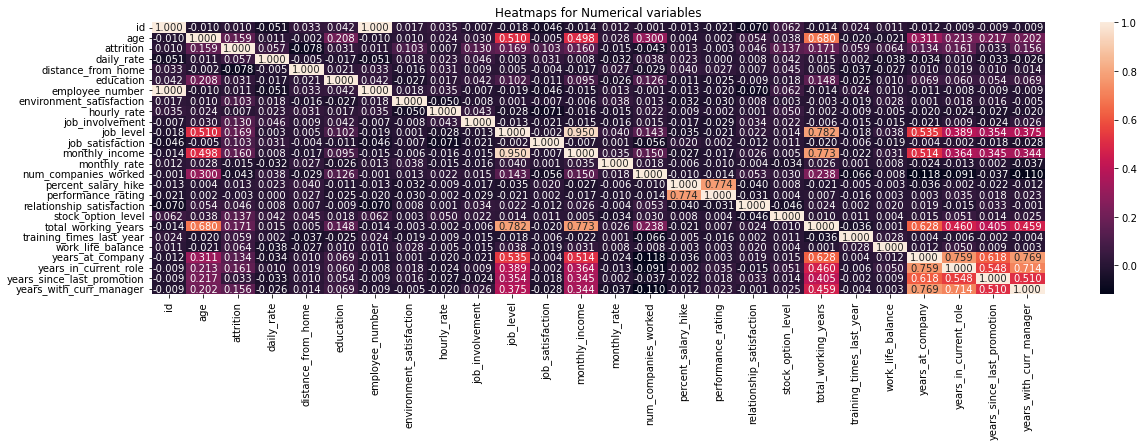

In [13]:
# Mulivariate Analysis: Numeric variables

plt.figure(figsize=[20,5])
sns.heatmap(df.corr(), annot = True, fmt =".3f")
plt.title("Heatmaps for Numerical variables");

### QUESTION 1: WHAT DO YOU THINK ARE THE 3 FACTORS BEHIND EMPLOYEE ATTRITION?

### ANSWER: THE FACTORS ARE: TOTAL WORKING YEARS, JOB LEVEL AND YEARS IN CURRENT ROLE

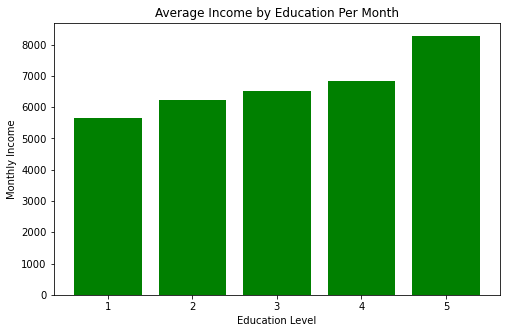

In [26]:
inc_edu = df.groupby("education")["monthly_income"].mean()

fig, ax = plt.subplots(figsize=(8,5))
plt.bar(inc_edu.index, inc_edu, color = "g")
plt.title("Average Income by Education Per Month")
plt.xlabel("Education Level")
plt.ylabel("Monthly Income");


### QUESTION 2: WHAT IS THE RELATIONSHIP BETWEEN EDUCATION AND MONTHLY INCOME?

### ANSWER: THERE IS A POSITIVE RELATIONSHIP BETWEEN MONTHLY INCOME AND EDUCATION; BECAUSE THE HIGHER THE EDUCATIONAL LEVEL, THE HIGHER THE AVERAGE MONTHLY INCOME


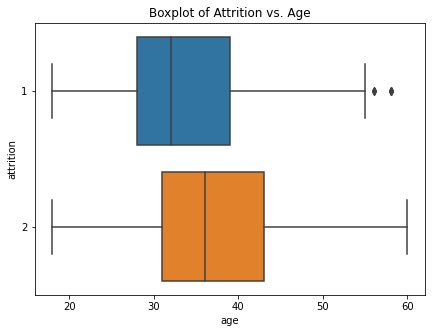

In [21]:
fig, ax = plt.subplots(figsize=(7, 5))
sns.boxplot(data=df, y="attrition", x="age",orient='h')
plt.title("Boxplot of Attrition vs. Age");

### QUESTION 3: WHAT IS THE EFFECT OF AGE ON ATTRITION?

### ANSWER: ATTRITION IS MORE COMMON AMIDST THE YOUNGER EMPLOYEES TO THAT OF THE OLDER EMPLOYEES

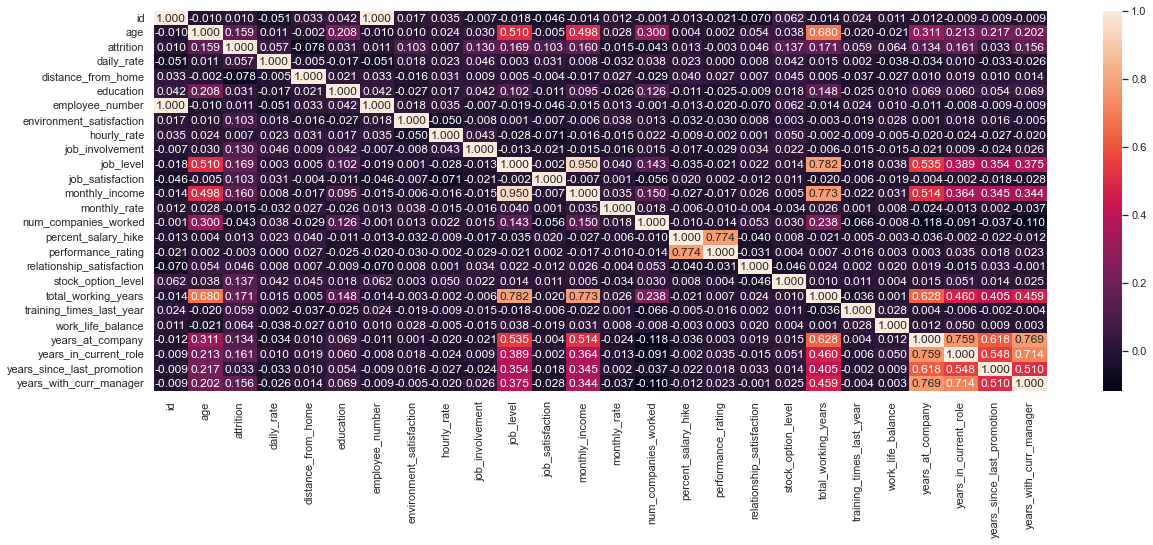

In [26]:
# Mulivariate Analysis: Numeric variables

plt.figure(figsize=[20,7])
sns.heatmap(df.corr(), annot = True, fmt =".3f");

### QUESTION4: IS INCOME THE MAIN FACTOR IN EMPLOYEE ATTRITION?

### ANSWER: ACCORDING THE HEATMAP ABOVE, INCOME IS NOT THE MAIN FACTOR; IT'S THE 4TH FACTOR

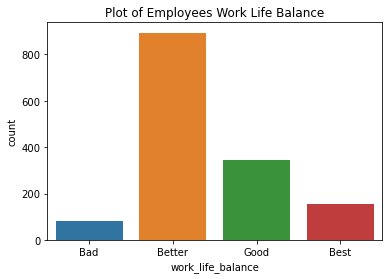

In [27]:
count = df["work_life_balance"].value_counts()
label = df["work_life_balance"].unique()
sns.countplot(data = df, x= "work_life_balance" )
plt.title("Plot of Employees Work Life Balance");



### QUESTION 5: HOW DOES WORK-LIFE BALANCE IMPACT THE OVERALL ATTRITION RATE?

### ANSWER:MAJORITY OF THE EMPLOYEES HAS A WORK-LIFE BALANCE "BETTER"

